## **Milestone 1: Data Collection, Exploration, and Preprocessing**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import   accuracy_score, classification_report, confusion_matrix,  roc_curve, auc, ConfusionMatrixDisplay

In [4]:
df_train = pd.read_csv("train.csv")
df_test = pd.read_csv("test.csv")

In [5]:
df_train.head()

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,0,15674932,Okwudilichukwu,668,France,Male,33.0,3,0.00,2,1.0,0.0,181449.97,0
1,1,15749177,Okwudiliolisa,627,France,Male,33.0,1,0.00,2,1.0,1.0,49503.50,0
2,2,15694510,Hsueh,678,France,Male,40.0,10,0.00,2,1.0,0.0,184866.69,0
3,3,15741417,Kao,581,France,Male,34.0,2,148882.54,1,1.0,1.0,84560.88,0
4,4,15766172,Chiemenam,716,Spain,Male,33.0,5,0.00,2,1.0,1.0,15068.83,0


In [6]:
df_train.shape

(14222, 14)

In [7]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14222 entries, 0 to 14221
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               14222 non-null  int64  
 1   CustomerId       14222 non-null  int64  
 2   Surname          14222 non-null  object 
 3   CreditScore      14222 non-null  int64  
 4   Geography        14222 non-null  object 
 5   Gender           14222 non-null  object 
 6   Age              14222 non-null  float64
 7   Tenure           14222 non-null  int64  
 8   Balance          14222 non-null  float64
 9   NumOfProducts    14222 non-null  int64  
 10  HasCrCard        14222 non-null  float64
 11  IsActiveMember   14222 non-null  float64
 12  EstimatedSalary  14222 non-null  float64
 13  Exited           14222 non-null  int64  
dtypes: float64(5), int64(6), object(3)
memory usage: 1.5+ MB


In [8]:
df_train.describe()

,id,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,14222.000000,1.422200e+04,14222.000000,14222.000000,14222.000000,14222.000000,14222.000000,14222.000000,14222.000000,14222.000000,14222.000000
mean,7110.500000,1.569172e+07,656.398256,37.991773,5.011391,55273.057464,1.552384,0.762129,0.499789,112965.117603,0.207355
std,4105.682099,7.176351e+04,80.749324,8.902499,2.816920,62759.893449,0.545933,0.425795,0.500018,50224.588673,0.405426
min,0.000000,1.556571e+07,359.000000,18.000000,0.000000,0.000000,1.000000,0.000000,0.000000,11.580000,0.000000
25%,3555.250000,1.563318e+07,597.000000,32.000000,3.000000,0.000000,1.000000,1.000000,0.000000,74850.840000,0.000000
50%,7110.500000,1.568947e+07,659.000000,37.000000,5.000000,0.000000,2.000000,1.000000,0.000000,119079.405000,0.000000
75%,10665.750000,1.575732e+07,710.000000,42.000000,7.000000,119787.760000,2.000000,1.000000,1.000000,155786.327500,0.000000
max,14221.000000,1.581563e+07,850.000000,82.000000,10.000000,250898.090000,4.000000,1.000000,1.000000,199992.480000,1.000000


**Handle Missing Values:**

In [9]:
df_train.isnull().sum()

,0
id,0
CustomerId,0
Surname,0
CreditScore,0
Geography,0
Gender,0
Age,0
Tenure,0
Balance,0
NumOfProducts,0


**Handle Duplicated:**

In [10]:
df_train.duplicated().sum()

np.int64(0)

**Handle Outliers:**

In [11]:
numeric_cols = [col for col in df_train.columns if df_train[col].dtypes != 'O']
categorical_cols = [col for col in df_train.columns if df_train[col].dtypes == 'O']

In [12]:
outliers_summary = {}
for col in ["CreditScore","Age","Tenure","Balance","EstimatedSalary"]:
    Q1 = df_train[col].quantile(0.25)
    Q3 = df_train[col].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR


    outliers = df_train[(df_train[col] < lower_bound) | (df_train[col] > upper_bound)]
    outliers_count = outliers.shape[0]
    outliers_summary[col] = outliers_count

for col, count in outliers_summary.items():
    print(f"Column: {col}, Outliers: {count}")

Column: CreditScore, Outliers: 19
Column: Age, Outliers: 547
Column: Tenure, Outliers: 0
Column: Balance, Outliers: 0
Column: EstimatedSalary, Outliers: 0


In [13]:
for col in ["CreditScore","Age","Tenure","Balance","EstimatedSalary"]:
    Q1 = df_train[col].quantile(0.25)
    Q3 = df_train[col].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    df_train = df_train[(df_train[col] >= lower_bound) & (df_train[col] <= upper_bound)]

In [14]:
df_train.shape

(13657, 14)

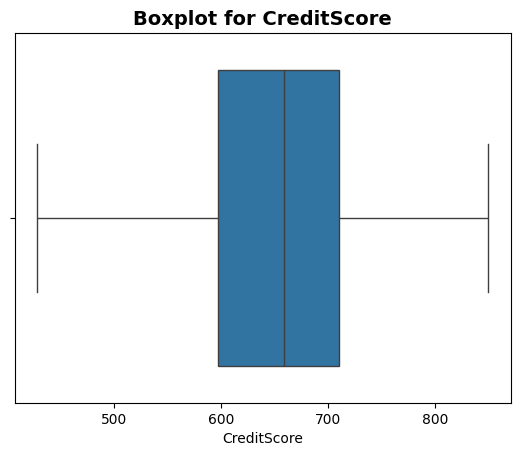

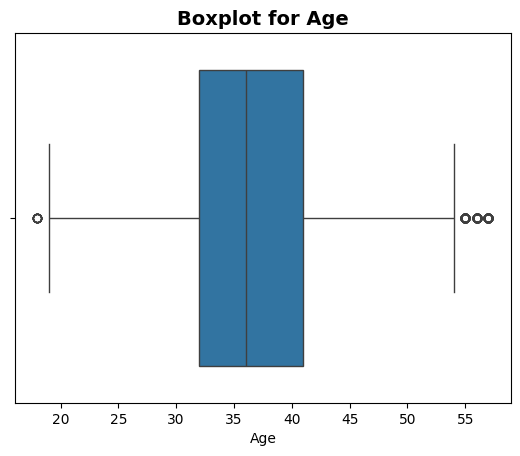

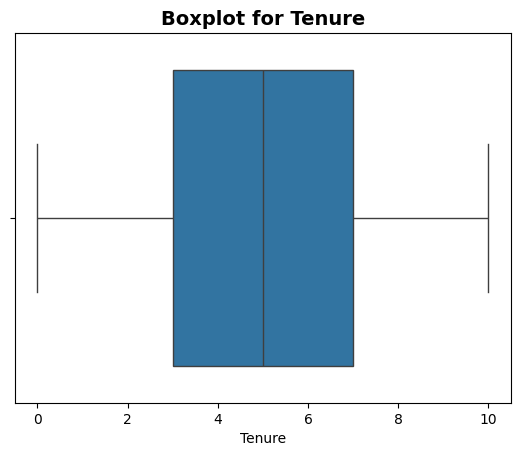

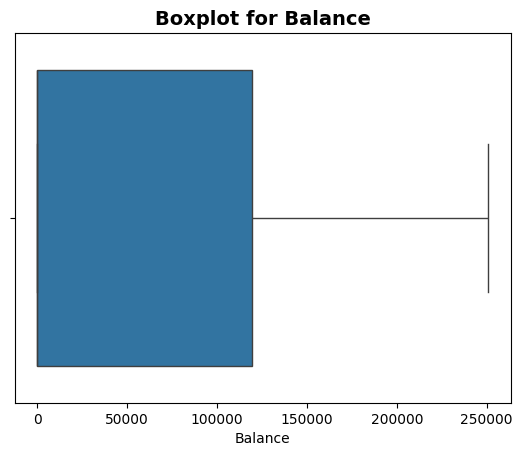

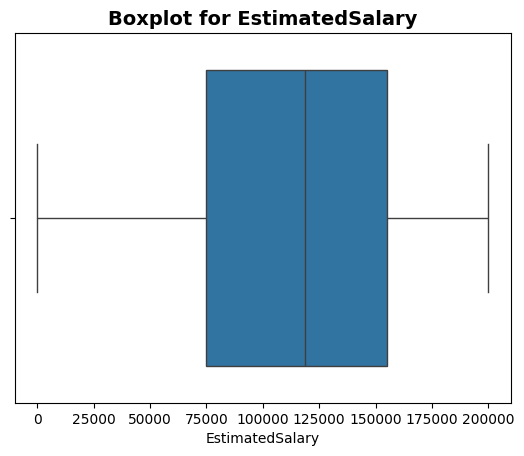

In [15]:
for col in ["CreditScore","Age","Tenure","Balance","EstimatedSalary"]:
    sns.boxplot(x = df_train[col])
    plt.title(f'Boxplot for {col}', fontsize=14, fontweight='bold')
    plt.show()

In [16]:
df_train.to_csv("cleaned_data.csv", index=False)

In [17]:
df_train.drop(["id","CustomerId","Surname"], axis=1, inplace=True)

**Encoding and Scaling:**

In [18]:
df_train.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,668,France,Male,33.0,3,0.00,2,1.0,0.0,181449.97,0
1,627,France,Male,33.0,1,0.00,2,1.0,1.0,49503.50,0
2,678,France,Male,40.0,10,0.00,2,1.0,0.0,184866.69,0
3,581,France,Male,34.0,2,148882.54,1,1.0,1.0,84560.88,0
4,716,Spain,Male,33.0,5,0.00,2,1.0,1.0,15068.83,0


In [19]:
# label encoding
df_train["Gender"] = df_train["Gender"].map({"Male": 0, "Female": 1})

# one-hot encoding
df_encoded = pd.get_dummies(df_train, columns=["Geography"], drop_first=True)
df_encoded.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain
0,668,0,33.0,3,0.00,2,1.0,0.0,181449.97,0,False,False
1,627,0,33.0,1,0.00,2,1.0,1.0,49503.50,0,False,False
2,678,0,40.0,10,0.00,2,1.0,0.0,184866.69,0,False,False
3,581,0,34.0,2,148882.54,1,1.0,1.0,84560.88,0,False,False
4,716,0,33.0,5,0.00,2,1.0,1.0,15068.83,0,False,True


In [20]:
df_encoded.to_csv("encoded_data.csv", index=False)

In [21]:
# feature scaling
from sklearn.preprocessing import StandardScaler
num_cols = ["CreditScore", "Age", "Tenure", "Balance", "NumOfProducts", "EstimatedSalary"]
scaler = StandardScaler()
df_scaled = df_encoded.copy()
df_scaled[num_cols] = scaler.fit_transform(df_scaled[num_cols])
df_scaled.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain
0,0.140008,0,-0.536458,-0.717208,-0.878387,0.815132,1.0,0.0,1.368590,0,False,False
1,-0.370757,0,-0.536458,-1.427551,-0.878387,0.815132,1.0,1.0,-1.266755,0,False,False
2,0.264585,0,0.406347,1.768991,-0.878387,0.815132,1.0,0.0,1.436832,0,False,False
3,-0.943810,0,-0.401771,-1.072380,1.496880,-1.021875,1.0,1.0,-0.566560,0,False,False
4,0.737976,0,-0.536458,-0.006866,-0.878387,0.815132,1.0,1.0,-1.954513,0,False,True


In [22]:
df_scaled.to_csv("scaled_data.csv", index=False)

In [23]:
df = df_scaled.copy()


In [24]:
X = df.drop("Exited", axis=1)
y = df["Exited"]

In [25]:
from imblearn.combine import SMOTEENN
smote_enn = SMOTEENN(random_state = 42)
X_resampled, y_resampled = smote_enn.fit_resample(X,y)

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled,y_resampled , test_size=0.2, random_state=42)


In [27]:
svm_model = SVC(kernel='rbf', random_state=42, probability=True)
svm_model.fit(X_train, y_train)

SVC(probability=True, random_state=42)

In [28]:
y_pred_svm = svm_model.predict(X_test)
y_prob_svm = svm_model.predict_proba(X_test)[:, 1]

In [36]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42, max_depth=10, max_samples=0.8, max_features=0.8)
rf_model.fit(X_train, y_train)


RandomForestClassifier(max_depth=10, max_features=0.8, max_samples=0.8,
                       random_state=42)

In [37]:
y_pred_rf = rf_model.predict(X_test)
y_prob_rf = rf_model.predict_proba(X_test)[:, 1]


In [38]:
results = {
    "SVM": {
        "accuracy": accuracy_score(y_test, y_pred_svm),
        "report": classification_report(y_test, y_pred_svm, output_dict=True),
        "confusion": confusion_matrix(y_test, y_pred_svm),
        "roc_auc": auc(*roc_curve(y_test, y_prob_svm)[:2])
    },
    "RandomForest": {
        "accuracy": accuracy_score(y_test, y_pred_rf),
        "report": classification_report(y_test, y_pred_rf, output_dict=True),
        "confusion": confusion_matrix(y_test, y_pred_rf),
        "roc_auc": auc(*roc_curve(y_test, y_prob_rf)[:2])
    }
}

In [39]:
print("=== SVM ===")
print("Accuracy:", results["SVM"]["accuracy"])
print("Classification Report:\n", classification_report(y_test, y_pred_svm))

=== SVM ===
Accuracy: 0.9099622422306128
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.92      0.90      1487
           1       0.94      0.90      0.92      1956

    accuracy                           0.91      3443
   macro avg       0.91      0.91      0.91      3443
weighted avg       0.91      0.91      0.91      3443



In [40]:
print("\n=== Random Forest ===")
print("Accuracy:", results["RandomForest"]["accuracy"])
print("Classification Report:\n", classification_report(y_test, y_pred_rf))


=== Random Forest ===
Accuracy: 0.9361022364217252
Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.94      0.93      1487
           1       0.96      0.93      0.94      1956

    accuracy                           0.94      3443
   macro avg       0.93      0.94      0.94      3443
weighted avg       0.94      0.94      0.94      3443



In [41]:
metrics_compare = pd.DataFrame({
    "Model": ["SVM", "Random Forest"],
    "Accuracy": [results["SVM"]["accuracy"], results["RandomForest"]["accuracy"]],
    "ROC-AUC": [results["SVM"]["roc_auc"], results["RandomForest"]["roc_auc"]]
})


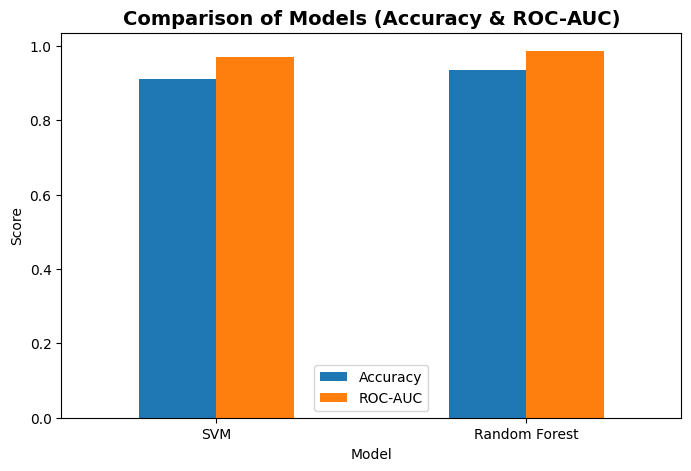

In [42]:
metrics_compare.set_index("Model")[["Accuracy", "ROC-AUC"]].plot(kind="bar", figsize=(8,5))
plt.title("Comparison of Models (Accuracy & ROC-AUC)", fontsize=14, fontweight="bold")
plt.ylabel("Score")
plt.xticks(rotation=0)
plt.show()


In [43]:
fpr_svm, tpr_svm, _ = roc_curve(y_test, y_prob_svm)
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_prob_rf)

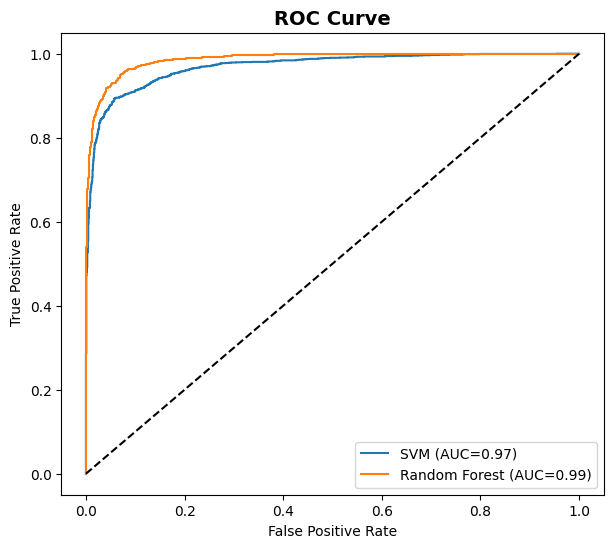

In [44]:
plt.figure(figsize=(7,6))
plt.plot(fpr_svm, tpr_svm, label=f"SVM (AUC={results['SVM']['roc_auc']:.2f})")
plt.plot(fpr_rf, tpr_rf, label=f"Random Forest (AUC={results['RandomForest']['roc_auc']:.2f})")
plt.plot([0,1], [0,1], "k--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve", fontsize=14, fontweight="bold")
plt.legend()
plt.show()

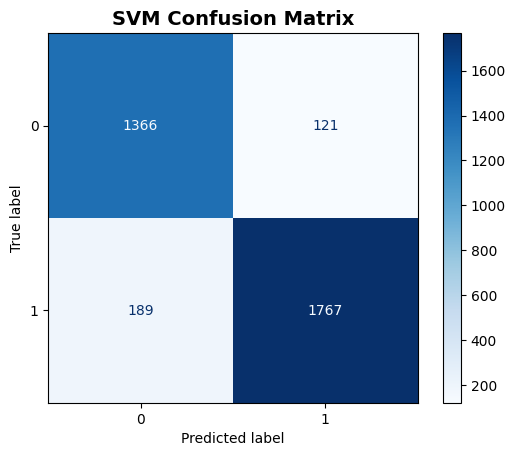

In [45]:
cm=confusion_matrix(y_test, y_pred_svm)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=svm_model.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title("SVM Confusion Matrix", fontsize=14, fontweight="bold")
plt.show()

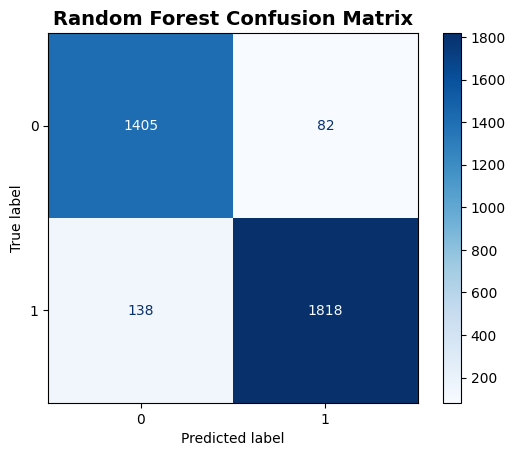

In [46]:
cm=confusion_matrix(y_test, y_pred_rf)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=rf_model.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title("Random Forest Confusion Matrix", fontsize=14, fontweight="bold")
plt.show()